## Financial EDA Practice

In [40]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [41]:
df=pd.read_csv("financial.csv")

In [42]:
df.head()

,Rank,Company,Industry,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Headquarters
0,1,Transamerica Corporation,Conglomerate,245510,42521,873,United States
1,2,Ping An Insurance Group,Insurance,191509,20738,1460,China
2,3,ICBC,Banking,182794,45783,5110,China
3,4,China Construction Bank,Banking,172000,39282,4311,China
4,5,Agricultural Bank of China,Banking,153884,31293,4169,China


In [43]:
df.isnull().sum()

Rank                              0
Company                           0
Industry                          0
Revenue in (USD Million)          0
Net Income in (USD Millions)      0
Total Assest in (USD Millions)    0
Headquarters                      0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rank                            50 non-null     int64 
 1   Company                         50 non-null     object
 2   Industry                        50 non-null     object
 3   Revenue in (USD Million)        50 non-null     int64 
 4   Net Income in (USD Millions)    50 non-null     int64 
 5   Total Assest in (USD Millions)  50 non-null     int64 
 6   Headquarters                    50 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.9+ KB


### EDA

<Axes: >

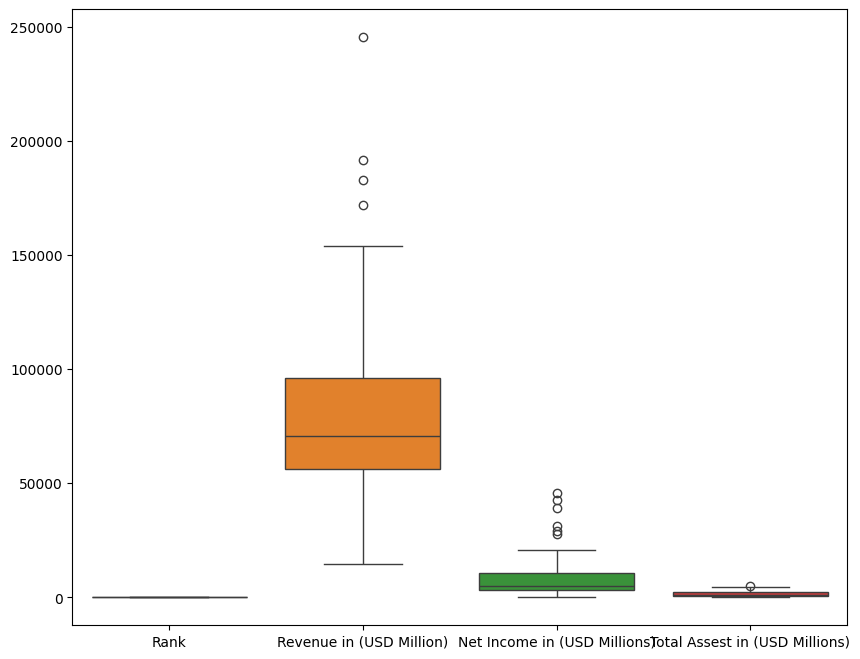

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)

Text(0.5, 1.0, 'Revenue insight')

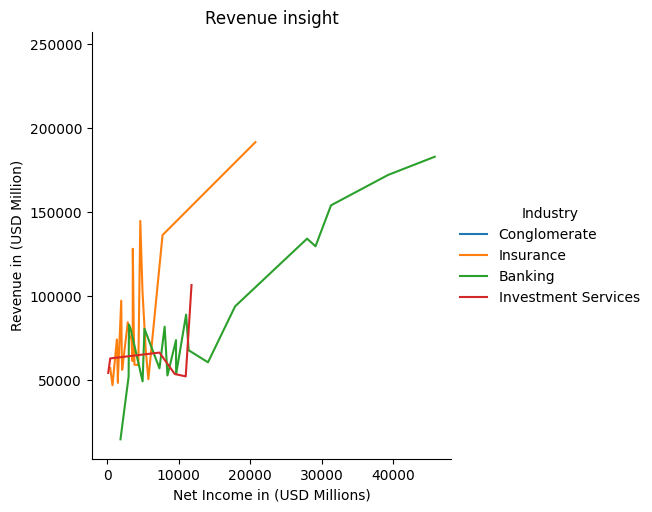

In [97]:

sns.relplot(data=df, y='Revenue in (USD Million)',x='Net Income in (USD Millions)',hue='Industry',kind='line')
plt.title('Revenue insight')

<Axes: xlabel='Revenue in (USD Million)', ylabel='Count'>

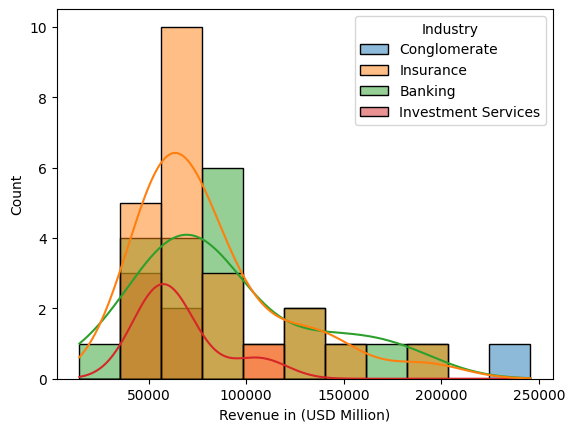

In [96]:
sns.histplot(data=df,x='Revenue in (USD Million)',kde=True,hue='Industry')

In [98]:
df.head()

,Rank,Company,Industry,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Headquarters
0,1,Transamerica Corporation,Conglomerate,245510,42521,873,United States
1,2,Ping An Insurance Group,Insurance,191509,20738,1460,China
2,3,ICBC,Banking,182794,45783,5110,China
3,4,China Construction Bank,Banking,172000,39282,4311,China
4,5,Agricultural Bank of China,Banking,153884,31293,4169,China


In [99]:
df['Company'].value_counts()

Company
Transamerica Corporation               1
Ping An Insurance Group                1
ICBC                                   1
China Construction Bank                1
Agricultural Bank of China             1
China Life Insurance                   1
Allianz                                1
Bank of China                          1
JP Morgan Chase                        1
AXA                                    1
Fannie Mae                             1
Life Insurance Corporation of India    1
Generali Group                         1
Bank of America                        1
Citigroup                              1
People's Insurance Company             1
Credit Agricole                        1
BNP Paribas                            1
HSBC                                   1
Wells Fargo                            1
State Farm                             1
Nippon Life                            1
Munich Re                              1
Dai-ichi Life                          1
Banco Sa

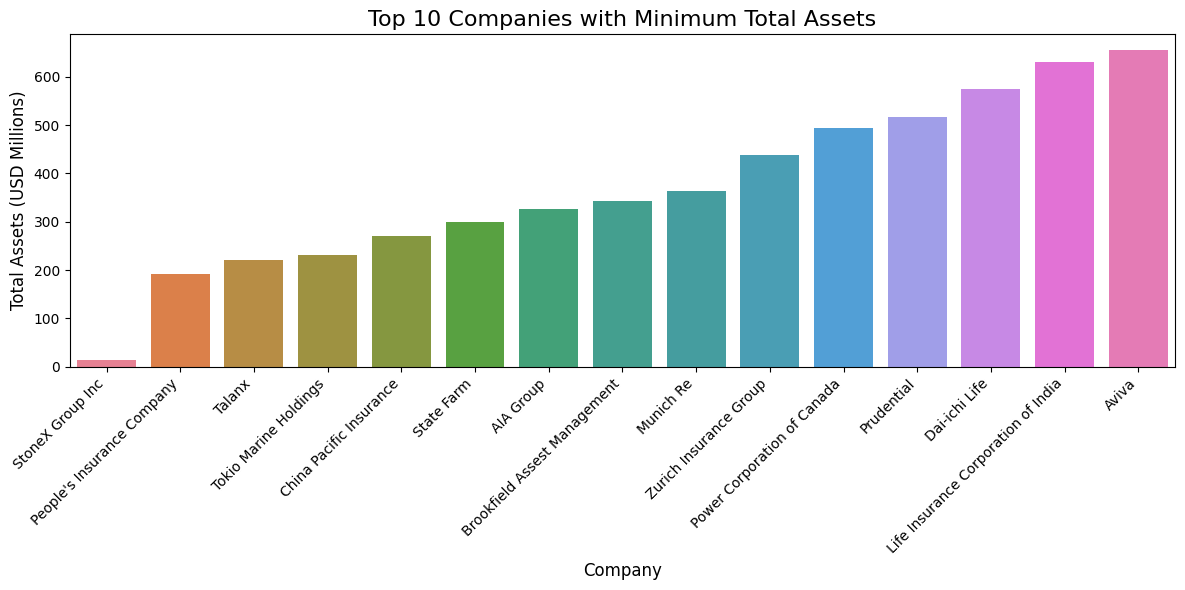

In [129]:

# Sort the data by 'Total Assets in (USD Millions)' in ascending order
df_sorted = df.sort_values(by='Total Assest in (USD Millions)')

# Select the top 10 companies with the smallest total assets
df_min_10 = df_sorted.head(15)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_min_10, 
    x='Company', 
    y='Total Assest in (USD Millions)', 
    hue='Company', 
    estimator='mean', 
    errorbar=None
)

# Add labels and title
plt.title('Top 10 Companies with Minimum Total Assets', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Total Assets (USD Millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

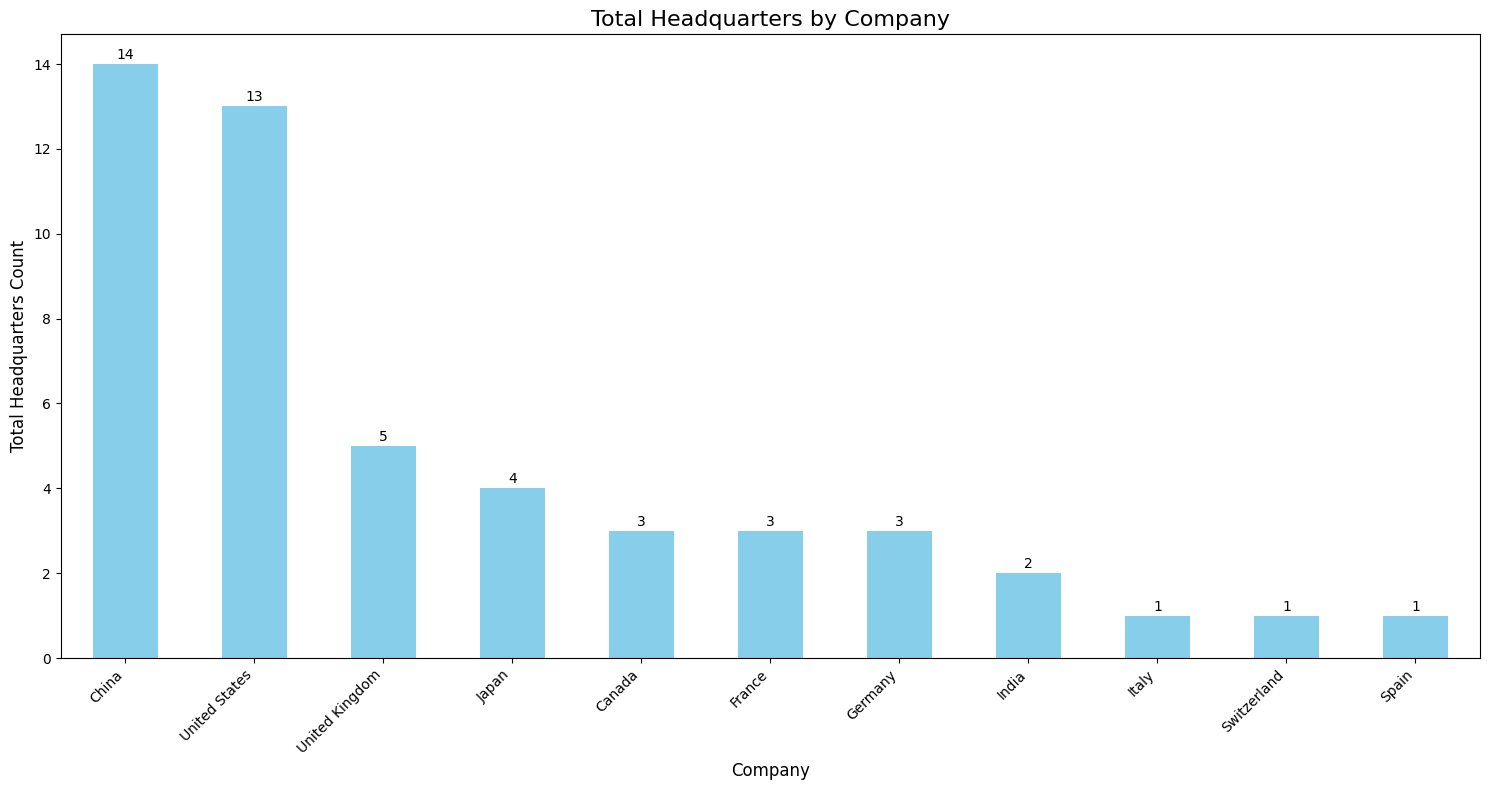

In [139]:
import matplotlib.pyplot as plt

# Group by 'Company' and count the total number of headquarters
headquarters_count = df.groupby('Headquarters')['Company'].count()

# Plot the data
plt.figure(figsize=(15, 8))
ax = headquarters_count.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Add values on top of the bars
for i, v in enumerate(headquarters_count.sort_values(ascending=False)):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Total Headquarters by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Total Headquarters Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


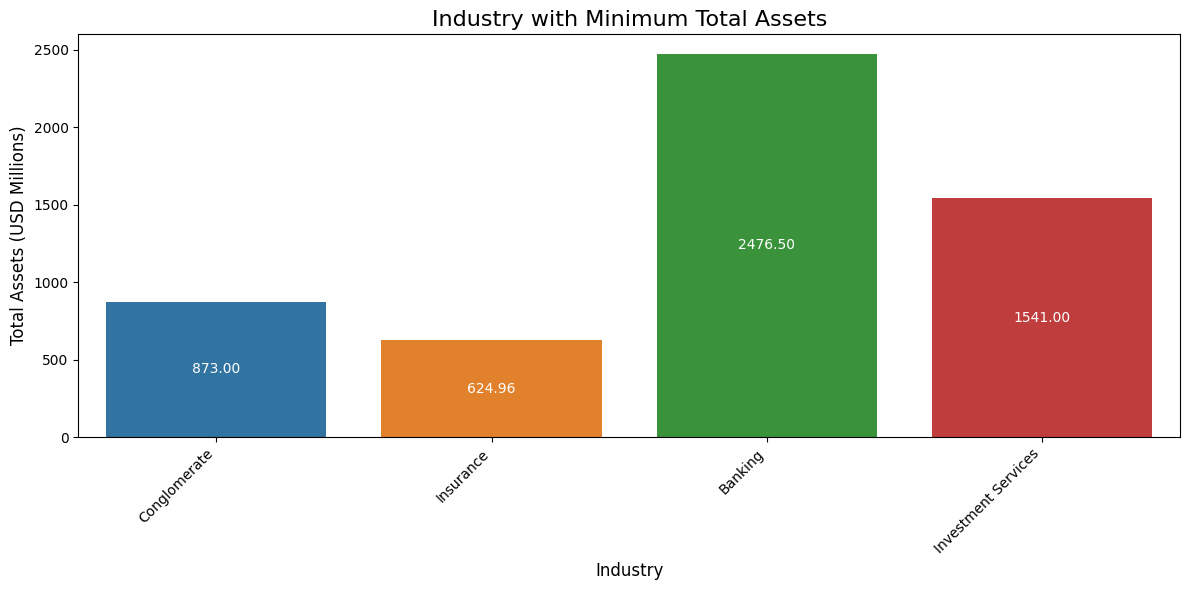

In [147]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df, 
    x='Industry', 
    y='Total Assest in (USD Millions)', 
    hue='Industry', 
    estimator='mean', 
    errorbar=None
)

# Add values inside the bars
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.text(p.get_x() + p.get_width() / 2, height / 2, 
            f'{height:.2f}', ha='center', va='center', fontsize=10, color='white')

# Add labels and title
plt.title('Industry with Minimum Total Assets', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Total Assets (USD Millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()